## Exploratory Data Analysis for Data Cleaning

Script Name: data_cleaning_eda.ipynb

Author: Brian Cain


The purpose of this jupyter notebook is to explore the joined data for characteristics of the data that need to be cleaned before advancing to the data analysis phase. Findings from this EDA will motivate data cleaning functions defined in the data_cleaning.py script. This jupyter notebook will also be fluid through time in that if data issues arise in the future I will come back to this notebook to further explore the data issues and cite any changes to be made to data_cleaning.py.

<hr>

In [1]:
##Import pandas for dataframe management/operations
import pandas as pd

##Import numpy 
import numpy as np

##Import tabulate for organized table creation
from tabulate import tabulate

In [2]:
##Pull in the joined dataframe
joinedDf = pd.read_csv('D:\\College_Football_Model_Data\\joinedDf.csv')

##Display the first couple rows of the data to ensure its been pulled in 
joinedDf.head()

,gameId,week_num,school,rush_td,pass_td,rush_attempt,yp_rush,rush_yards,yp_pass,completion_attempts,...,offensive_plays,offensive_drives,offensive_ppa,offensive_successRate,offensive_explosiveness,offensive_powerSuccess,offensive_stuffRate,offensive_lineYards,offensive_secondLevelYards,offensive_openFieldYards
0,400603830,1,Florida,4,4,41,5.4,222,10.1,31-38,...,81.0,13.0,0.489647,0.567901,1.272267,0.666667,0.146341,3.360976,1.414634,1.121951
1,400603830,1,New Mexico State,1,1,22,2.9,64,4.7,15-29,...,51.0,13.0,0.000437,0.274510,1.332495,0.666667,0.250000,2.565000,0.950000,1.000000
2,400787302,1,Ohio,2,3,38,5.4,205,11.4,20-25,...,64.0,10.0,0.474904,0.531250,1.228407,1.000000,0.111111,3.752778,1.638889,1.388889
3,400787302,1,Idaho,2,1,28,3.6,100,6.2,36-48,...,78.0,12.0,0.094651,0.538462,0.832628,0.750000,0.080000,3.520000,1.080000,0.520000
4,400763403,1,Texas,0,0,29,2.1,60,4.5,8-23,...,53.0,12.0,-0.101281,0.264151,1.123873,0.000000,0.120000,2.532000,0.720000,0.040000


Lets first examine the data types of the data to see which features might need cleaning to start.

In [3]:
##Display the dataframe data types
joinedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10078 entries, 0 to 10077
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      10078 non-null  int64  
 1   week_num                    10078 non-null  int64  
 2   school                      10078 non-null  object 
 3   rush_td                     10078 non-null  int64  
 4   pass_td                     10078 non-null  int64  
 5   rush_attempt                10078 non-null  int64  
 6   yp_rush                     10078 non-null  float64
 7   rush_yards                  10078 non-null  int64  
 8   yp_pass                     10078 non-null  float64
 9   completion_attempts         10078 non-null  object 
 10  pass_yards                  10078 non-null  int64  
 11  total_yards                 10078 non-null  int64  
 12  turnovers                   10078 non-null  int64  
 13  tfl                         100

From prior knowledge of this dataset, all the float64 and int64 data objects look correct as is. We can note some object data type columns that we must deal with in order to start cleaning the dataset. These are listed below:

<b><i>Hyphenated Data:</i></b>
* completion_attempts
* penalty_yards
* fourthDown_eff
* thirdDown_eff

<b><i>Time Data:</i></b>
* possession_time

<b><i>List Data:</i></b>
* Quarterly_points

In the section below we will perform transformations to better format the dataset to the columns listed above. 

### Hyphenated Data

Below we will take a look at what is meant by "hyphenated" data. Essentially this is a datapoint where there is a "-" between two integers to indicates that a team has gone "# for #" in some statistic.

In [4]:
##Display the hyphenated data columns
joinedDf[['completion_attempts','penalty_yards','fourthDown_eff','thirdDown_eff']].head()

,completion_attempts,penalty_yards,fourthDown_eff,thirdDown_eff
0,31-38,1-10,2-2,10-15
1,15-29,1-9,2-3,1-12
2,20-25,10-92,0-0,5-10
3,36-48,3-30,4-5,4-14
4,8-23,4-50,0-0,2-14


One of the first things that needs to be addressed is if these data columns all have a "-" present, if not then the data may have an incorrect component to it. 

In [5]:
##Display results of assessing if all data is hypenated
hyph_colNames = ['completion_attempts','penalty_yards','fourthDown_eff','thirdDown_eff']
hyph_data = [['Column','Status']]
for i in hyph_colNames:
    if len(joinedDf[joinedDf[i].str.contains('-')]) != len(joinedDf):
        hyph_data.append([i,'Incorrect'])
    else:
        hyph_data.append([i,'Correct'])
print('Check all Data has "-":')
print(tabulate(hyph_data,headers='firstrow',tablefmt='grid'))

Check all Data has "-":
+---------------------+----------+
| Column              | Status   |
+=====================+==========+
| completion_attempts | Correct  |
+---------------------+----------+
| penalty_yards       | Correct  |
+---------------------+----------+
| fourthDown_eff      | Correct  |
+---------------------+----------+
| thirdDown_eff       | Correct  |
+---------------------+----------+


The above results indicates that all data has a "-" present. This result generically indicates the data is a correct structure and we can move on to splitting the hyphenated data up. We now write a function to split hyphenated data into two new columns. 

Another thing that it would be important to check is if there is some error including a "--" double hyphen. This would indicate incorrect data and we'd want to explore places where this happens. 

In [6]:
#joinedDf['penalty_yards'].loc[joinedDf['penalty_yards'].str.len() < 4].str.split('-')
hyph_data = [['Column','Status']]
for i in hyph_colNames:
    if len(joinedDf[joinedDf[i].str.contains('--')]) > 0:
        hyph_data.append([i,'Incorrect'])
    else:
        hyph_data.append([i,'Correct'])
print('Check no Data has "--":')
print(tabulate(hyph_data,headers='firstrow',tablefmt='grid'))

Check no Data has "--":
+---------------------+-----------+
| Column              | Status    |
+=====================+===========+
| completion_attempts | Correct   |
+---------------------+-----------+
| penalty_yards       | Incorrect |
+---------------------+-----------+
| fourthDown_eff      | Correct   |
+---------------------+-----------+
| thirdDown_eff       | Correct   |
+---------------------+-----------+


The above result shows that the penalty_yards column has a double "--" present, we will now explore the rows of data where this is happening. 

In [7]:
##Filter data to location where double hypen is occuring
print('Row of "--" Occurence:')
display(joinedDf[joinedDf['penalty_yards'].str.contains('--')][['gameId','school','penalty_yards']])
print('\nGame Record of "--" Occurence:')
gameId = (joinedDf.loc[joinedDf['penalty_yards'].str.contains('--'),'gameId'].tolist()[0])
joinedDf[joinedDf['gameId']==gameId][['gameId','school','penalty_yards']]

Row of "--" Occurence:


,gameId,school,penalty_yards
6092,401012776,Arizona State,7--4953



Game Record of "--" Occurence:


,gameId,school,penalty_yards
6092,401012776,Arizona State,7--4953
6093,401012776,USC,4-33


Above we see that only a single row is affected by this error, and the overall game corresponding to this error has a fine entry for penalty_yards for the other team. This data issue is a relatively simple fix, we will simply impute the value with the following:
* New Value = $7-y\cdot7$ where $y=$ average yards per penalty in the dataset. 

If this data error ever pops up in the future as well we will use the same data imputation technique. 

In [8]:
##Define function that imputes average yards per penalty for corrupt penalty yards data
####as documented above.
def imputeAvg_penalty_yards(df,colName,error_delim='--',delim='-'):
    
    ##Filter dataframe to where the error is not
    splitData = df[~df[colName].str.contains(error_delim)][colName].str.split(delim,expand=True)
    numPenalties, numYards = np.array(splitData[0]).astype(float), np.array(splitData[1]).astype(float)
    
    ##Compute average yards per penalty
    mean_ypp = 0
    n = len(numPenalties)
    for i,j in zip(numPenalties,numYards):
        if i != 0 and j != 0:
            mean_ypp = mean_ypp + (j/i)/n
    
    ##Define function for replacing error delimieter
    def replace_delim(x,error_delim,delim,mean_ypp):
        if error_delim in x:
            x = x.replace(error_delim,delim)
            delim_loc = x.find(delim)
            x = x[:delim_loc+1] + str(int(int(x[:delim_loc])*mean_ypp))
            return x
        else:
            return x
    
    ##Edit rows with incorrect data and impute average penalty yards
    correctedData = df[colName].tolist()
    for i in range(len(correctedData)):
        correctedData[i] = replace_delim(correctedData[i],error_delim,delim,mean_ypp)
    df[colName] = correctedData
    
    return df

##Now lets fix the penalty_yards double-hyphenation issue and assess if it worked
joinedDf = imputeAvg_penalty_yards(joinedDf,'penalty_yards')
hyph_data = [['Correct','Incorrect']]
for i in hyph_colNames:
    if len(joinedDf[joinedDf[i].str.contains('--')]) > 0:
        hyph_data.append([i,'Incorrect'])
    else:
        hyph_data.append([i,'Correct'])
print('Check all Data has "--":')
print(tabulate(hyph_data,headers='firstrow',tablefmt='grid'))

Check all Data has "--":
+---------------------+-------------+
| Correct             | Incorrect   |
+=====================+=============+
| completion_attempts | Correct     |
+---------------------+-------------+
| penalty_yards       | Correct     |
+---------------------+-------------+
| fourthDown_eff      | Correct     |
+---------------------+-------------+
| thirdDown_eff       | Correct     |
+---------------------+-------------+


The above result indicates that the issue with double-hypenation has been resolved. 

The next issue we must address is moving the hyphenation data into a form that can be better used for feature engineering and statistical modeling. To do this we will split each hyphenated column into two columns of integers. I have listed these splits below:
* completion_attempts $\rightarrow$ passAttempt, passComplete
* penalty_yards $\rightarrow$ penalties, penalty_yardage
* fourthDown_eff $\rightarrow$ fourthAttempts, fourthSuccess
* thirdDown_eff $\rightarrow$ thirdAttempts, thirdSuccess

Below a function is defined to perform these splits and the new columns are added to the dataframe. We display these new columns below. 

In [9]:
##Define function to split hyphenated data into two new columns
####NOTE: delimineter is default "-" but there is an option to change in for function generalizability
def hyphenated_split(df,colName,newNames,delim='-'):
    
    ##Split by delimineter to create new columns and drop old column
    df[newNames] = df[colName].str.split(delim, expand=True)
    df = df.drop(colName,axis=1)
    
    return df

##Now for each of the hyphenated columns lets perform this transformation 
hyph_newNames = [['passAttempt','passComplete'],['penalties','penalty_yardage'],
                 ['fourthAttempts','fourthSuccess'],['thirdAttempts','thirdSuccess']]
for i in range(len(hyph_colNames)):
    joinedDf = hyphenated_split(joinedDf,hyph_colNames[i],hyph_newNames[i])

In [10]:
##Display the new dataframe with split columns
joinedDf[['passAttempt','passComplete','penalties','penalty_yardage',
          'fourthAttempts','fourthSuccess','thirdAttempts','thirdSuccess']].head()

,passAttempt,passComplete,penalties,penalty_yardage,fourthAttempts,fourthSuccess,thirdAttempts,thirdSuccess
0,31,38,1,10,2,2,10,15
1,15,29,1,9,2,3,1,12
2,20,25,10,92,0,0,5,10
3,36,48,3,30,4,5,4,14
4,8,23,4,50,0,0,2,14


We can see the split data resulting from the original hypenated columns is now in a much better form for future statistical modeling. The data is no longer string data so we'll be able to create new columns/features from this data to better evaluate game outcomes. 

### Time Data

Now we must address the possession_time column. This data is given in the format of a mm:ss time count that indicates how long during a game the team had possession of the ball. 

Realistically speaking the we don't need any seconds data. This is because the minutes data is granular enough information for us to precisely model how long teams control the ball during a game. Therefore we'll perform the following data transformation:
* possession_time $\rightarrow$ possession_minutes

Below we define a function to perform this data transformation. 

In [11]:
##Define function to replace possession time with integer value possession minutes
def possession_minutes(df,colName):
    
    ##Create possession_minutes column and drop possession_time column
    df['possession_minutes'] = df.apply(lambda row: row[colName][:row[colName].find(':')], axis = 1)
    df = df.drop(colName,axis=1)
    
    return df

##Apply operation to dataframe and view results
joinedDf = possession_minutes(joinedDf,'possession_time')
joinedDf['possession_minutes'].head()

0    37
1    22
2    29
3    30
4    20
Name: possession_minutes, dtype: object

### List Data

The only list data we have comes from the Quarterly_points column. Each row in this column contains a list with 4 elements, for example [7,14,0,3]. The element of the list are the points scored per quarter, out of all 4 quarters. We will perform the following transformation:
* Quarterly_points $\rightarrow$ Q1_points, Q2_points, Q3_points, Q4_points


Before we perform the above transformation we must look take a further look at aspects of the Quarterly_points list. For now we'll ignore rows with missing data as this is addressed in further sections of this data cleaning notebook. 

Each Quarterly_points list should have 4 entries for 4 quarters of football. We'd like to assess if this is true and will do so below. 

In [12]:
##Import package neccesary for handling strings of lists
from ast import literal_eval

##Add columns to dataframe that will inform us of games with more than 4 quarters
joinedDf['Quarterly_points1'] = joinedDf.apply(lambda row: [] if str(row['Quarterly_points']) == 'nan' 
                                               else literal_eval(str(row['Quarterly_points'])),axis=1)
joinedDf['quarters_available'] = joinedDf.apply(lambda row: len(row['Quarterly_points1']), axis = 1)

##Display what list lengths are present in the data
print('Documented Lengths of Quarterly_points Lists:')
print(np.unique(joinedDf['quarters_available'].tolist()))

Documented Lengths of Quarterly_points Lists:
[ 0  2  3  4  5  6  7  8  9 10 11 13]


We can see we have lists present with more than and less than 4 quarters. First we'll examine lists with more than 4 quarters. 

In [13]:
##Display games with more than 4 quarters (examine 11 quarters as an example)
joinedDf.loc[joinedDf['quarters_available']==11,['gameId','Quarterly_points','gameSeason']]

,gameId,Quarterly_points,gameSeason
4034,400944993,"[14, 0, 0, 17, 7, 7, 0, 8, 6, 6, 3]",2017.0
4035,400944993,"[10, 7, 7, 7, 7, 7, 0, 8, 6, 6, 6]",2017.0
6540,401012356,"[7, 10, 7, 7, 3, 7, 8, 3, 6, 8, 8]",2018.0
6541,401012356,"[7, 3, 7, 14, 3, 7, 8, 3, 6, 8, 6]",2018.0


The games above with more than 4 quarters are a result of overtime games. For each of the observed records for unique Game Id's the scores match after the first 4 entries, indicating all additional entries are a result of overtime rounds. To fix this we'll simply only keep the first 4 entries of every list because there is no intention to garner insights from overtime football at this point in time. 

Now believe I display some records of games with less than 4 entries. We aren't concerned with length 0 lists for now because that is a result of currently ignoring completely missing values until later in this script. 

In [14]:
##Display games with more than 4 quarters (examine 11 quarters as an example)
joinedDf.loc[joinedDf['quarters_available'].isin([2,3]),['gameId','Quarterly_points','gameSeason','school']].head(10)

,gameId,Quarterly_points,gameSeason,school
2185,400869605,"[14, 21]",2016.0,Kansas State
4112,400941816,"[20, 17, 14]",2017.0,UCF
4113,400941816,"[7, 9, 7]",2017.0,Cincinnati


After some additional research on ESPN, the game above was shortened due to a rain delay resulting in 3 quarters of play:

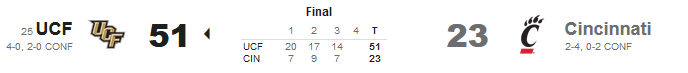

The other displayed game was due to a lightning cancellation resulting in only 2 quarters of play:

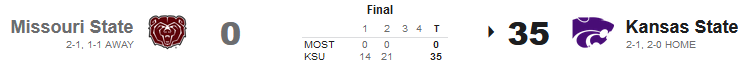

Given these games are only partially played this will skew all covariates to be unreflective of a full game. Therefore as a step to protect information truly reflective of team quality we'll drop games that didn't have 4 full quarters.

Now we'll define a function to perform the data transformation and simultaneously resolve issues of lists not of length 4. 

In [15]:
##Drop created dataframe columns used for exploration
joinedDf = joinedDf.drop('quarters_available',axis=1)
joinedDf = joinedDf.drop('Quarterly_points1',axis=1)

##Define function to split quarterly points in gameDf into separate columns
def split_quarterly_pts(df):
    
    df['Quarterly_points'] = df.apply(lambda row: [] if str(row['Quarterly_points']) == 'nan' else
                                               literal_eval(str(row['Quarterly_points'])),axis=1)
    df['quarters_available'] = df.apply(lambda row: len(row['Quarterly_points']), axis = 1)
    
    ##Drop games that are not 4 quarters (delayed/cancelled games)
    df = df.loc[~df['quarters_available'].isin([1,2,3]),:]
    
    ##Filter columns to only have the first 4 quarters (overtime games)
    df['Quarterly_points'] = df.apply(lambda row: row['Quarterly_points'] if len(row['Quarterly_points'])==0 
                                       else row['Quarterly_points'][0:4],axis=1)

    for i,j in zip(['Q1_points','Q2_points','Q3_points','Q4_points'],[0,1,2,3]):
        df[i] = df.apply(lambda row: row['Quarterly_points'][j] if len(row['Quarterly_points'])>0 else 0, axis = 1)

    ##Drop quarterly points column
    df = df.drop('Quarterly_points',axis=1)
        
    return df

##Perform operation and display results from data transformation
joinedDf = split_quarterly_pts(joinedDf)
joinedDf[['gameId','school','Q1_points','Q2_points','Q3_points','Q4_points','quarters_available']].head()

C:\Users\btcai\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\btcai\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,gameId,school,Q1_points,Q2_points,Q3_points,Q4_points,quarters_available
0,400603830,Florida,7,27,13,14,4
1,400603830,New Mexico State,0,13,0,0,4
2,400787302,Ohio,21,7,3,14,4
3,400787302,Idaho,0,0,0,0,0
4,400763403,Texas,0,0,3,0,4


Above we can view the new quarter points columns. We already see a result motivating further data cleaning in the 3rd row where quarters_available = 0. This will be addressed in the upcoming section. 

### Missing Data

In this section we'll explore where missing data is in the dataframe. Additionally we will try to find the root cause of missing data and correct the issue in a way that attempts to make the data as complete as possible. 

In the missing data study directly below we exclude the quarter points columns since none of these technically have missing data, but there were some records with 0 quarters available. We'll study that after this. 

In [16]:
##Loop through all columns to assess how many missing values each column has
print('Column Missing Data Count:')
print('--------------------------')
for i in joinedDf.columns:
    missingCount = joinedDf[i].isnull().sum()
    print(i+': '+str(missingCount))

Column Missing Data Count:
--------------------------
gameId: 0
week_num: 0
school: 0
rush_td: 0
pass_td: 0
rush_attempt: 0
yp_rush: 0
rush_yards: 0
yp_pass: 0
pass_yards: 0
total_yards: 0
turnovers: 0
tfl: 0
sacks: 0
qb_hurries: 0
fumbles_lost: 0
interceptions: 0
firstDowns: 0
defensive_td: 0
homeBool: 0
gameSeason: 691
team_id: 691
points: 691
elo: 1335
offensive_plays: 144
offensive_drives: 144
offensive_ppa: 144
offensive_successRate: 144
offensive_explosiveness: 144
offensive_powerSuccess: 144
offensive_stuffRate: 144
offensive_lineYards: 144
offensive_secondLevelYards: 147
offensive_openFieldYards: 391
passAttempt: 0
passComplete: 0
penalties: 0
penalty_yardage: 0
fourthAttempts: 0
fourthSuccess: 0
thirdAttempts: 0
thirdSuccess: 0
possession_minutes: 0
quarters_available: 0
Q1_points: 0
Q2_points: 0
Q3_points: 0
Q4_points: 0


In the results above we note that several columns have the same exact number of missing values, this is likely not a coincidence. These groups of columns are listed below:
* [gameSeason,team_id,points] have 691 missing values
* [offensive_plays,offensive_drives,offensive_ppa,offensive_successRate,offensive_explosiveness,offensive_powerSuccess,offensive_stuffRate,offensive_lineYards] have 144 missing values
* offensive_openFieldYards has 391 missing values
* offensive_secondLevelYards has 147 missing values
* elo has 1335 missing records

Missing points, team_id, and gameSeason potentially being as a result of not being fbs. 

In [17]:
##Filter data to determine which schools these nans are occuring for (only need to filter on 1 nan column, use points)
schoolsMissing = joinedDf.loc[joinedDf['points'].isna(),'school'].unique()

##Determine if these schools are fbs teams and should be in our data
schoolsMissing_in_fbs = []
teamDf = pd.read_csv('D:\\College_Football_Model_Data\\teamDf.csv')
for i in schoolsMissing:
    if i in teamDf['school'].tolist():
        schoolsMissing_in_fbs.append(i)
        
##Display which teams we are missing that are in the fbs
print('FBS Schools that have Missing Data:')
if schoolsMissing_in_fbs:
    for i in schoolsMissing_in_fbs:
        print('i')
else:
    print('No FBS Schools comprise missing data records.')

FBS Schools that have Missing Data:
No FBS Schools comprise missing data records.


We don't necessarily want games in the data involving FCS teams. This is because typically FBS teams schedule FCS teams as a break week to get healthy and often the statistics of these games are deflated or inflated as a result. Therefore it doesn't give much information as to a team's true potential, so we'll remove all game data involving these FCS teams. 

In [18]:
##Get rid of games with missing aggregated data as a result of not being FBS teams
gameId_null = joinedDf.loc[joinedDf['points'].isna(),'gameId'].tolist()
joinedDf = joinedDf[joinedDf['gameId'].isin(gameId_null)==False]

Now that we've gotten rid of these games lets evaluate what the missing data picture looks like:

In [19]:
##Loop through all columns to assess how many missing values each column has
print('Column Missing Data Count:')
print('--------------------------')
for i in joinedDf.columns:
    missingCount = joinedDf[i].isnull().sum()
    print(i+': '+str(missingCount))

Column Missing Data Count:
--------------------------
gameId: 0
week_num: 0
school: 0
rush_td: 0
pass_td: 0
rush_attempt: 0
yp_rush: 0
rush_yards: 0
yp_pass: 0
pass_yards: 0
total_yards: 0
turnovers: 0
tfl: 0
sacks: 0
qb_hurries: 0
fumbles_lost: 0
interceptions: 0
firstDowns: 0
defensive_td: 0
homeBool: 0
gameSeason: 0
team_id: 0
points: 0
elo: 10
offensive_plays: 90
offensive_drives: 90
offensive_ppa: 90
offensive_successRate: 90
offensive_explosiveness: 90
offensive_powerSuccess: 90
offensive_stuffRate: 90
offensive_lineYards: 90
offensive_secondLevelYards: 91
offensive_openFieldYards: 290
passAttempt: 0
passComplete: 0
penalties: 0
penalty_yardage: 0
fourthAttempts: 0
fourthSuccess: 0
thirdAttempts: 0
thirdSuccess: 0
possession_minutes: 0
quarters_available: 0
Q1_points: 0
Q2_points: 0
Q3_points: 0
Q4_points: 0


We can now see that there is much less missing data as a result of removing games involving FCS opponents. Lets now address the elo missing data. 

In [20]:
joinedDf.loc[joinedDf['elo'].isnull(),['gameId','school','offensive_plays','gameSeason']]

,gameId,school,offensive_plays,gameSeason
578,400768337,James Madison,87.0,2015.0
579,400768337,SMU,73.0,2015.0
2050,400869441,James Madison,86.0,2016.0
2051,400869441,North Carolina,64.0,2016.0
3496,400941790,James Madison,65.0,2017.0
3497,400941790,East Carolina,82.0,2017.0
5052,401013091,James Madison,69.0,2018.0
5053,401013091,NC State,72.0,2018.0
6788,401112143,James Madison,69.0,2019.0
6789,401112143,West Virginia,68.0,2019.0


Via ESPN we attain further information about James Madison football. The team will become an FBS team in 2022 so it shows up in the database, but should be dropped for all previous seasons because they were FCS.

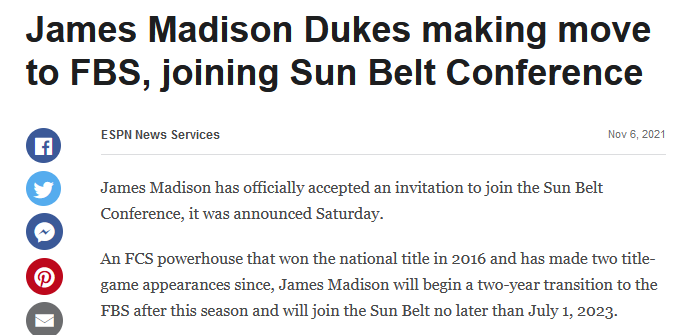

In [21]:
##Get rid of games involving James madison
gameId_null = joinedDf.loc[joinedDf['school'] == 'James Madison','gameId'].tolist()
joinedDf = joinedDf[joinedDf['gameId'].isin(gameId_null)==False]

Now we will evaluate the next group of columns that had a large amount of missing values, these were within the offensive advanced metric columns. 

In [22]:
##Display records with the following missing value columns
largeMissing = ['offensive_plays','offensive_drives','offensive_ppa','offensive_successRate',
                'offensive_explosiveness','offensive_powerSuccess','offensive_stuffRate','offensive_lineYards']
joinedDf.loc[joinedDf['offensive_plays'].isna(),['gameId','school','offensive_plays']]

,gameId,school,offensive_plays
100,400787107,Hawai'i,NaN
101,400787107,Colorado,NaN
1170,400787345,Buffalo,NaN
1171,400787345,Kent State,NaN
1190,400763646,Rice,NaN
...,...,...,...
9827,401309643,Arkansas State,NaN
9874,401282265,Old Dominion,NaN
9875,401282265,Middle Tennessee,NaN
9882,401282264,Southern Mississippi,NaN


We can take care of the missing data for the offensive_plays and offensive drives columns with logic. The logic is as follows:
* <b>Offensive Plays:</b> Impute with (rush_attempts + passAttempts), neither of these columns have missing values. 
* <b>Offensive Drives:</b> 
    * Compute average_plays_per_drive (offensive_plays/offensive_drives) for whole dataframe
    * Impute with (offensive_plays/average_plays_per_drive)

In [23]:
##Define a function that imputes the offensive_plays and offensive_drives variable
def impute_plays_drives(df):
    
    ##Impute missing offensive plays data
    df.loc[df['offensive_plays'].isnull(),'offensive_plays'] = (df.loc[df['offensive_plays'].isnull(),'rush_attempt'].astype(int)+
                                                                df.loc[df['offensive_plays'].isnull(),'passAttempt'].astype(int))

    ##Impute missing offensive drives data
    df.loc[df['offensive_drives'].isnull(),'offensive_drives'] = (np.mean(df.loc[~df['offensive_drives'].isnull(),'offensive_plays']/
                                                                          df.loc[~df['offensive_drives'].isnull(),'offensive_drives'])
                                                                  *df.loc[df['offensive_drives'].isnull(),'offensive_plays'])
    
    return df

##Perform imputation of plays and drives
joinedDf = impute_plays_drives(joinedDf)

Now we need to address the remaining missing columns:
* offensive_ppa: 90
* offensive_successRate: 90
* offensive_explosiveness: 90
* offensive_powerSuccess: 90
* offensive_stuffRate: 90
* offensive_lineYards: 90
* offensive_secondLevelYards: 91
* offensive_openFieldYards: 289

These are all metrics and its hard to impute these in a similar fashion to offensive_plays and offensive_drives. Instead, we can take a predictive modeling approach to data imputation here because we have other related features in the dataset that can give us an educated guess on some of these metrics. 

For each of the remaining columns with missing data we will use a Random Forest Regressor to predict the true value of the missing data. Each of the missing data columns we are attempting to predict have features with no missing data that should aid in their prediction. It is important to note that doing this imputation technique might introduce additional collinearity between predictors, however this will be accounted for in the modeling stage of the project. In addition, these missing values account for an extremely low percentage of the dataset so we hope doing this imputation adds more value than it does harmful effects in terms of collinearity. 

In [50]:
##Import random forest model API
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pickle

##Define features and columns we need to imput
imputePredictors = ['rush_td', 'pass_td', 'rush_attempt','yp_rush', 'rush_yards', 'yp_pass', 'pass_yards', 
                    'total_yards','points','offensive_plays']
imputeResponses = ['offensive_ppa','offensive_successRate','offensive_explosiveness','offensive_powerSuccess',
             'offensive_stuffRate','offensive_lineYards','offensive_secondLevelYards','offensive_openFieldYards']

##Create a model for each response that needs to be imputed
for i in imputeResponses:
    
    ##Create training and test set for the model
    x = joinedDf.loc[~joinedDf[i].isnull(),imputePredictors]
    y = joinedDf.loc[~joinedDf[i].isnull(),i]

    #Perform the train/test split on the data
    from sklearn.model_selection import train_test_split
    train_x, val_x, train_y, val_y = train_test_split(x, y, 
                                                      random_state = 0, ##random seed set for reproducible results
                                                      test_size = .10)
    
    ##Create and fit the random forest regressor
    rfModel = RandomForestRegressor(n_estimators = 100, random_state = 0)
    rfModel.fit(train_x, train_y)
    
    ##Display results of the model
    y_pred = rfModel.predict(val_x)
    print('Model: '+i)
    print('MAE = '+str(mean_absolute_error(val_y, y_pred)))
    print('Validation Standard Deviation = '+str(np.sqrt(np.var(val_y))))
    print('-------------------------')
    
    ##Save the model to storage location
    filename = 'C:\\Users\\btcai\\OneDrive\\Documents\\GitHub\\Bayesian_College_Football\\Data_Wrangle\\Imputation_Models\\'+i
    pickle.dump(rfModel, open(filename, 'wb'))

MAE for Model: offensive_ppa
0.06346759170177997
0.192855797174643
-------------------------
MAE for Model: offensive_successRate
0.045541995839968034
0.0911531877953251
-------------------------
MAE for Model: offensive_explosiveness
0.16846759058816427
0.24241567973730893
-------------------------
MAE for Model: offensive_powerSuccess
0.20632037864703373
0.27311946655141245
-------------------------
MAE for Model: offensive_stuffRate
0.05932355295339754
0.08526123565197077
-------------------------
MAE for Model: offensive_lineYards
0.4196924361467173
0.7514478269730746
-------------------------
MAE for Model: offensive_secondLevelYards
0.20852218443904993
0.3776414040198022
-------------------------
MAE for Model: offensive_openFieldYards
0.45773264249721507
1.0153922714594015
-------------------------


Above we have created each imputation model and displayed the results. The metric used to measure the result is:
$$\text{Mean Absolute Error} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})$$

Additionally for each model, we have displayed the standard deviation of the testing data for the response. This is done because if the MAE is greater than the standard deviation then the model is essentially useful in term of imputation. This is because the model can't even predict within a range of the correct value as good as randomness can. 

Now we'll define some functions to impute the data using these models. 

In [ ]:
##Define function for imputing data with predictive model
def impute_data_predictive(model,predictors,response):
    
    test['poly2_pred'] = (test.apply(lambda x: polynomial2[polynomial2_index].predict_proba([[x['diff_points_movAvg'],x['diff_rush_yards_movAvg'],
                                                          x['diff_pass_yards_movAvg'],x['diff_total_yards_movAvg'],
                                                          x['diff_turnovers_movAvg'],
                                                          x['opposition_diff_points_movAvg'],
                                                          x['opposition_diff_rush_yards_movAvg'],
                                                          x['opposition_diff_pass_yards_movAvg'],
                                                          x['opposition_diff_total_yards_movAvg'],
                                                          x['opposition_diff_turnovers_movAvg']]])[0][1],
                                  axis=1))
    
    return 0

### Extreme Values

## Aggregating Data